# Task 2

<i>Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data</i>


# About the DataSet

We are using the Titanic Dataset here. It contains both numerical and string values.

## The predefined columns are -

`Passenger ID` - To identify unique passengers

`Survived` - If they survived or not

`P Class` - The class passengers travelled in

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

`Name` - Passenger Name

`Sex` - Gender of Passenger

`Age` - Age of passenger

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`SibSp` - Number of siblings or spouse

`Parch` - Parent or child

`Ticket` - Ticket number

`Fare` - Amount paid for the ticket

`Cabin` - Cabin of residence

`Embarked` - Point of embarkmen


##  Importing the necessary libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the dataset

In [75]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Titanic-Dataset.csv")

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## shape of the dataframe

In [77]:
df.shape

(891, 12)

## Information about the dataframe

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking for null/missing values in the dataset

In [80]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

`Observation & Inference:`
- There are 177 null values in the age column,687 in Cabin, 2 in Embarked
- since the cabin column is not of much use and contains a lot of null values so we will drop it.

## Dropping unnecessary columns

In [81]:
df.drop(columns="Cabin",axis=1,inplace=True)

## Filling the missing values of the age column by Mean value of the column

In [82]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

## Filling the missing values of the Embarked column by Mode value of the column

In [83]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [84]:
df.isnull().sum().sum()

0

`Observation & Inference:`
- All the missing values are treated

## Checking for duplicate values in the dataset

In [85]:
df.duplicated().sum()

0

`Observation & Inference:`
- No duplicate records are present


## Checking the survival of people

In [86]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## Visualization of survival of people

### Countplot

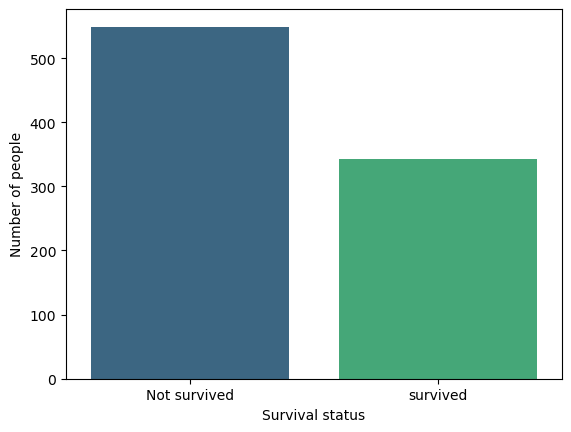

In [87]:
sns.countplot(x='Survived',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

### Pie chart

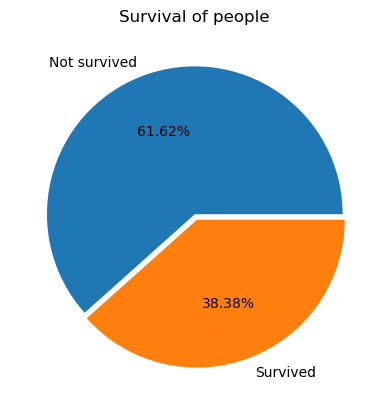

In [88]:
plt.pie(df['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Not survived','Survived'])
plt.title("Survival of people")
plt.show()

## Visualization of people survived from different gender

In [89]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

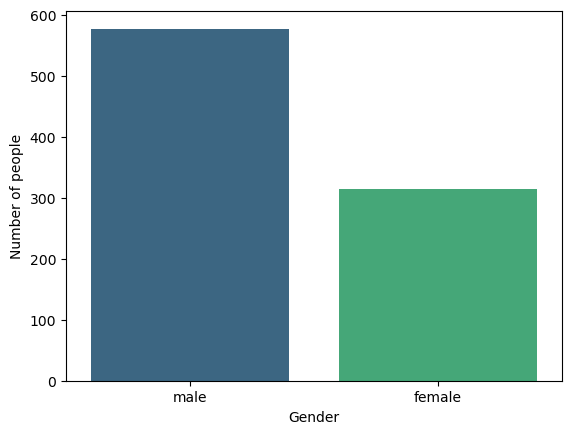

In [90]:
sns.countplot(x='Sex',data=df,palette='viridis',)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

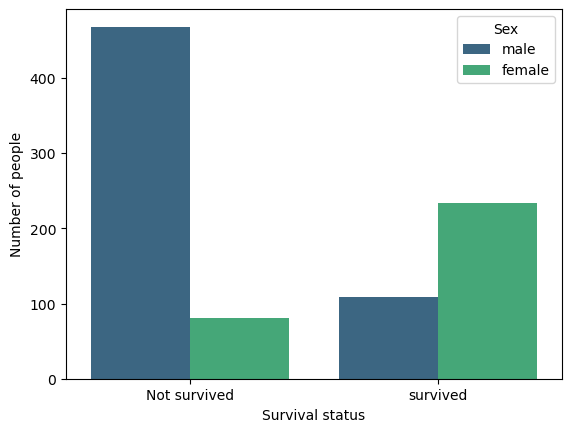

In [91]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

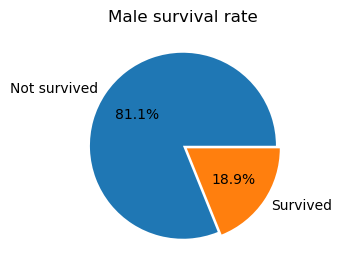

In [92]:
df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Male survival rate")
plt.show()

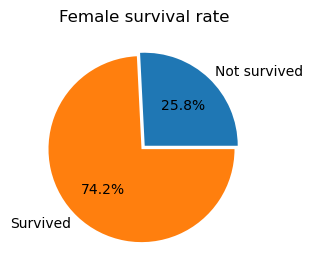

In [93]:
df[df['Sex'] == 'female'].Survived.groupby(df.Survived).count().plot(kind='pie',
figsize=(3, 6),explode=[0,0.05],autopct='%1.1f%%',labels=["Not survived","Survived"])
plt.ylabel("")
plt.title("Female survival rate")
plt.show()

`Observation:`
- Survival rate was female was much higher in comparison to male

## visualizing the population of different passenger class

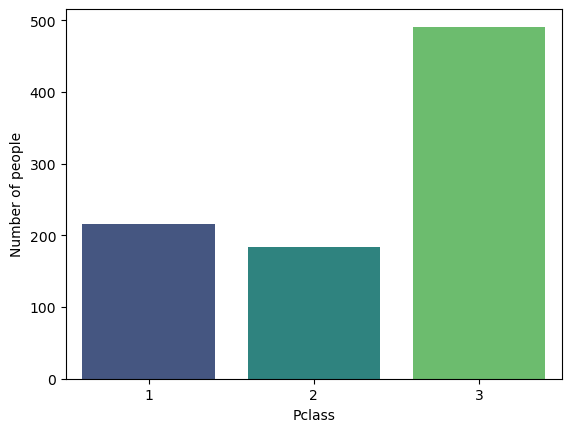

In [94]:
sns.countplot(x='Pclass',data=df,palette='viridis',)
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.show()

## Visualization of people survived from different passenger class

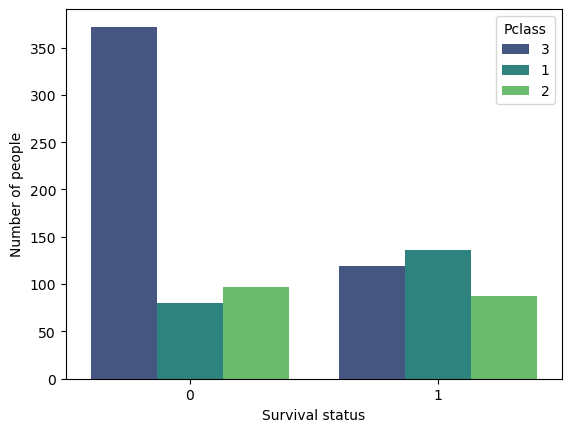

In [95]:
df['Pclass'] = df['Pclass'].astype(str)
sns.countplot(x='Survived', hue='Pclass', data=df, palette='viridis')
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.show()

`Observation:`
- Though population of P class 3 was the highest, yet they had the least survival rate
- Males from P class 3 had the least survival rate

## Visualization of people survived from different Embarkment

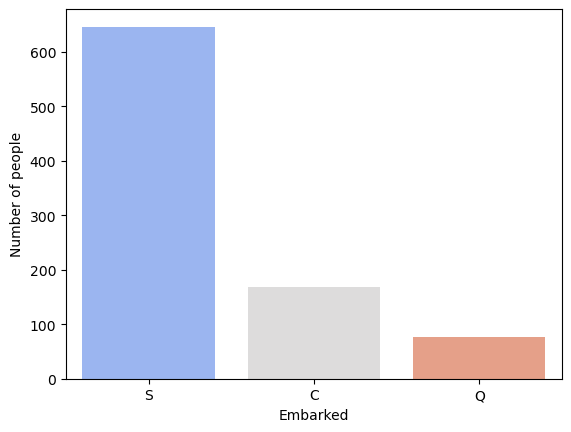

In [96]:
sns.countplot(x='Embarked',data=df,palette='coolwarm',)
plt.xlabel("Embarked")
plt.ylabel("Number of people")
plt.show()

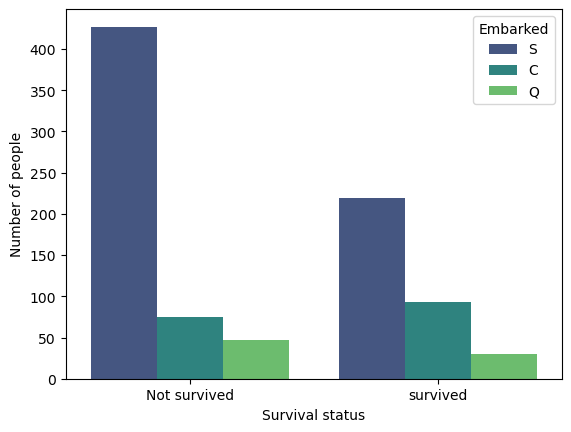

In [97]:
sns.countplot(x='Survived',hue='Embarked',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

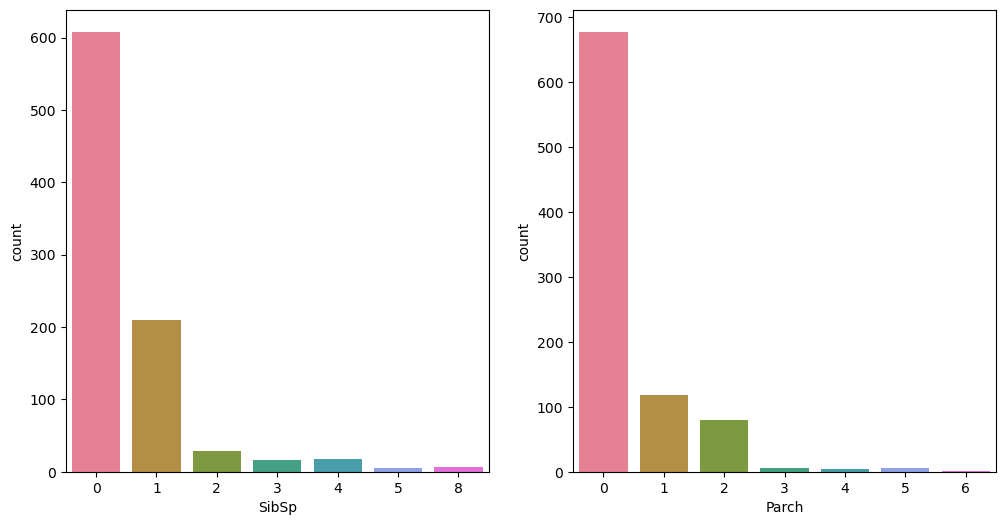

In [98]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SibSp',data=df,ax=axes[0],palette='husl')
sns.countplot(x='Parch',data=df,ax=axes[1],palette='husl')
plt.show()

## Distribution of Fare and age

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


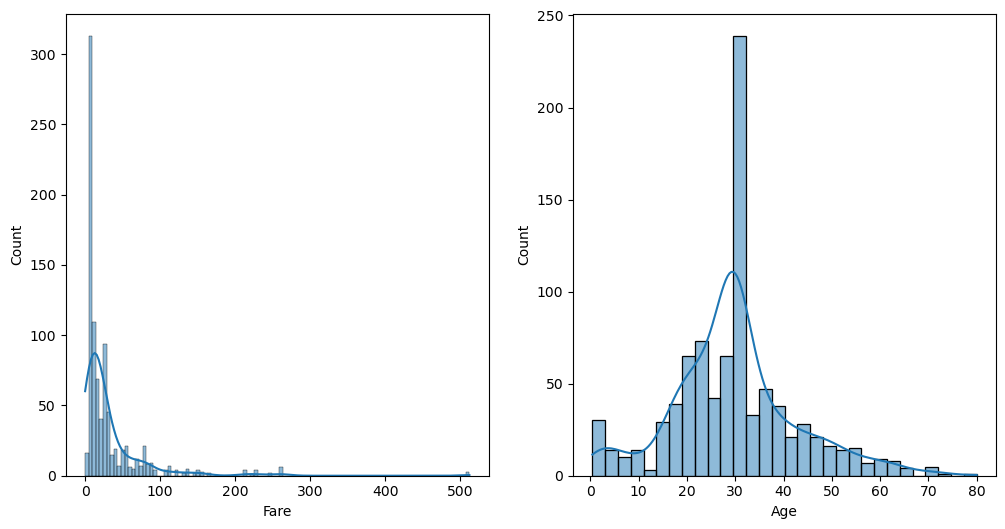

In [99]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['Fare'], kde=True,ax=axes[0])
sns.histplot(df['Age'].dropna(),kde=True,ax=axes[1])
plt.show()

## Visualizing survival rate in different age category

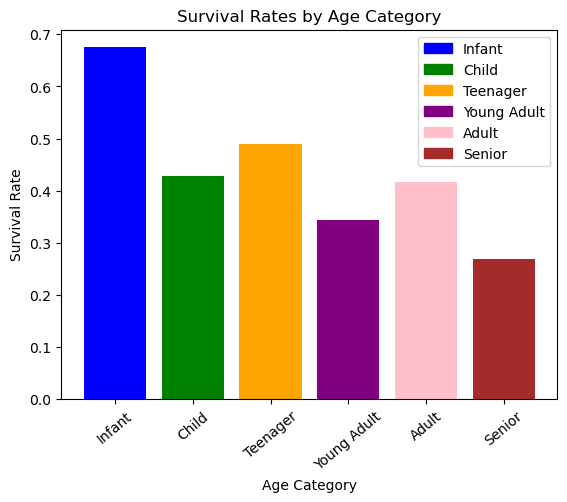

In [100]:
# Define cut points and label names
cut_points = [ 0, 5, 12, 18, 35, 60, 100]
label_names = [ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

# Create the "Age_categories" column
df['Age_categories'] = pd.cut(df['Age'], bins=cut_points, labels=label_names,right=False)

# Creating a pivot table for survival rates based on age categories
age_cat_pivot = df.pivot_table(index="Age_categories", values="Survived")

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'purple', 'pink', 'brown']

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)

# Adding a legend with the specified colors
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=40)
plt.show()

`Observation:`
   - Young adult had the least survival rate

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


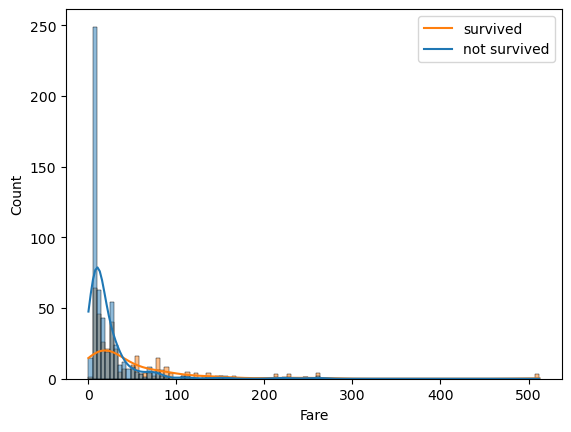

In [101]:
sns.histplot(x='Fare',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


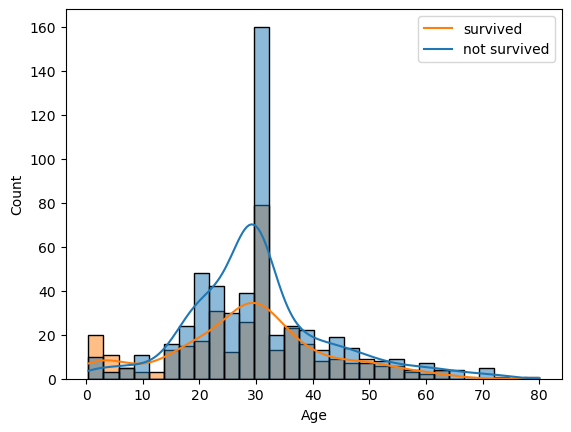

In [102]:
sns.histplot(x='Age',hue='Survived',data=df,kde=True)
plt.legend(labels=['survived','not survived'])
plt.show()

## Checking for correlation

In [103]:
df.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,Adult


In [105]:
df_num = df[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]

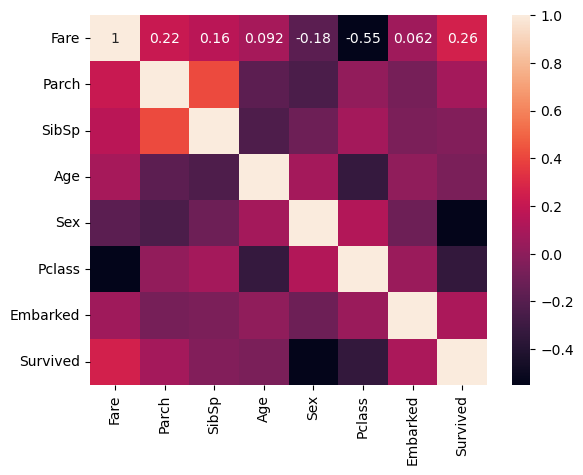

In [106]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

`Observation:`
- Fare, sex, Pclass, Embarked has correlation with survived column

# `Conclusion`:


1. **Gender Disparity**: The survival rate among females was significantly higher compared to males. This observation aligns with the "women and children first" protocol followed during the Titanic disaster, reflecting societal norms of the time prioritizing women's and children's safety.

2. **Passenger Class Disparity**: Although the population of passengers in Class 3 was the highest, they had the lowest survival rate. This indicates a potential correlation between socio-economic status and survival, with passengers in higher classes likely having better access to lifeboats and other resources during the evacuation.

3. **Gender and Passenger Class Interaction**: Further analysis reveals that males from Class 3 had the lowest survival rate. This suggests a compounded effect of gender and socio-economic status, where male passengers in the lower classes faced the highest risk of not surviving the disaster.

4. **Age Factor**: Young adults had the least survival rate, indicating that age played a role in survival outcomes. This could be attributed to the "women and children first" policy, where younger individuals were given priority during the evacuation.

5. **Correlation with Survived Column**: The variables fare, sex, passenger class (Pclass), and embarkation point (Embarked) show correlations with the survival outcome. This reinforces the importance of these factors in determining survival chances during the Titanic disaster.
